# Data Visualzation

## Problem Description 
 
### Predict the Flat Resale Prices in Singapore 
 
Investing in Flats is the biggest investment for most households in cities like Singapore which is very small but heavily urbanised. Therefore, being able to accurately value the flat prices will not only facilitate market transactions by providing valuable guidance for all market participants (be it home owners, home buyers, landlords, tenants or banks that underwrite mortgages), but also provide useful insights for policy makers and government authorities in understanding the current state of the economy. 

### Methodology :
Data Pre-processing, Exploratory Data Analysis using Visualization techniques, Model building.
 
 
Target attribute : "resale_price" 
 
 

In [65]:
import math
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
def df_by_town(df):
    """Parses a dataframe by town and returns result in a dictionary."""
    town_list = np.array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN',
       'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS',
       'YISHUN', 'SEMBAWANG', 'PUNGGOL'], dtype=object)
    town_df_dict = {}
    
    for town in town_list:
        town_df_dict[town] = df[df['town'] == town]
    return town_df_dict

def months_in_year(year):
    """Generates a list of string representing all months in the given year."""
    year = str(year)
    beg = '-01'
    end = '-12'
    return [x.strftime('%Y-%m') for x in pd.period_range(year + beg, year + end, freq='M')]

def mean_price_per_sqm(df):
    """Returns the mean price per sqm for given HDB dataframe."""
    price_tag = 'resale_price'
    area_tag = 'floor_area_sqm'
    ave = df.loc[:, price_tag].divide(df.loc[:, area_tag])
    return ave.mean()

In [67]:
df1 = pd.read_csv("train1.csv",sep=',', header=0, na_values='unknown')
df2 = pd.read_csv("train2.csv",sep=',', header=0, na_values='unknown')
df3 = pd.read_csv("train3.csv",sep=',', header=0, na_values='unknown')

frames = [df1, df2, df3]
df = pd.concat(frames)

df['town'] = df['town'].map(lambda x: x.strip())
df['flat_type'] = df['flat_type'].map(lambda x: x.strip())

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
df.shape


(121934, 12)

In [70]:
df.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,uniqueID
0,172,Improved,2 ROOM,45.0,1986,2012-03,NaN,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100000
1,510,Improved,2 ROOM,44.0,1980,2012-03,NaN,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,100001
2,610,New Generation,3 ROOM,68.0,1980,2012-03,NaN,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,100002
3,474,New Generation,3 ROOM,67.0,1984,2012-03,NaN,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,100003
4,604,New Generation,3 ROOM,67.0,1980,2012-03,NaN,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,100004


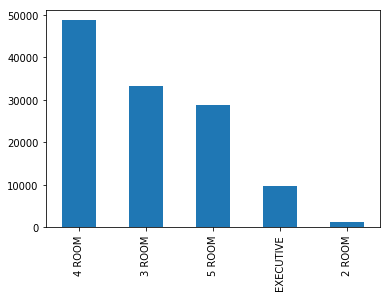

In [10]:
df['flat_type'].value_counts()[:5].plot(kind='bar') 
#We can see majority flat types in Singapore are 4 ROOM/3 ROOM

In [12]:
#Create Year Column in dataset based on month column
df['year'] = pd.DatetimeIndex(df['month']).year


In [15]:
# To check Overall resale price over the years, from 2012~2018
df_Year = df.groupby(['year'],as_index=True).mean()[['resale_price']]

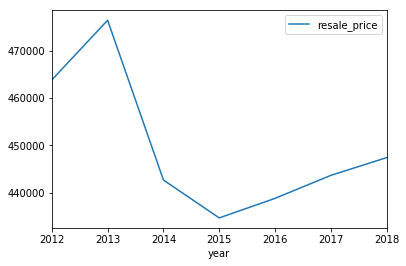

In [16]:
df_Year.plot(kind='line')

In [22]:

# Useful names for analyzing and plotting 

import itertools

# String representations 

# Months from 2012 to 2018.
months = []
for year in range(2012, 2018):
    months += months_in_year(year)

# Flat types.
flat_types = df.flat_type.unique()
flat_types.sort()

# Town names
towns = df.town.unique()
towns.sort()

# Fonts used for plotting 
plt_font = matplotlib.font_manager.FontProperties(size=10, family='Consolas')
plt_font_small = matplotlib.font_manager.FontProperties(size=6, family='Consolas')

# Colors used for plotting

# Color for line plot.
line_color = '#E74C3C'  

# Two sets of colors for flat types.
flat_colors_jet = {flat: plt.cm.jet(i * 0.8 / len(flat_types) + 0.2) for i, flat in enumerate(flat_types)}
flat_colors_light = ['#3E454C', '#2185C5', '#7ECEFD', '#FFF6E5', '#FF7F66', '#29D9C2', '#BDF271']

# 26 colors for towns.
town_colors = list(itertools.chain(
    [plt.cm.autumn(i) for i in np.linspace(0., 1, 6)],     # The colors used for data of each town
    [plt.cm.Greens(i) for i in np.linspace(0.2, 0.9, 6)],  # when they are in the same plot.
    [plt.cm.PuBu(i) for i in np.linspace(0.2, 0.8, 7)],    # The number of towns is 26.
    [plt.cm.RdPu(i) for i in np.linspace(0.3, 1, 7)]
))

# Color used for bar plotting.
bar_color_2000 = '#7ECEFD'
bar_color_2015 = '#FF7F66'


##### xticks used for plotting #####

xticks = {
    'half_year': {
        'locs': range(0, len(months), 6),
        'labels': [item for i, item in enumerate(months) if i % 6 == 0]
    },
    'one_year': {
        'locs': range(0, len(months), 12),
        'labels': [item for i, item in enumerate(months) if i % 12 == 0]
    },
}

In [23]:
price_SG = {}
for month in months:
    price_SG[month] = mean_price_per_sqm(df[df.month == month])

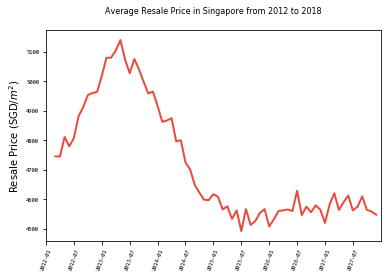

In [25]:
# Get data for plot.
y = [price_SG[item] for item in months]

# Plot line.
fig = plt.plot(y, color=line_color, linewidth=2)

# Figure settings - ticks and labels.
plt.xticks(xticks['half_year']['locs'], xticks['half_year']['labels'],
           fontproperties=plt_font_small, rotation=70)
plt.yticks(fontproperties=plt_font_small)
plt.tick_params(axis='x', which='both', top='off')
plt.ylabel(r'Resale Price (SGD/$m^2$)')
plt.xlim([0, len(months)])

# Set title.
plt_title = "Average Resale Price in Singapore from 2012 to 2018"
plt.title(plt_title, y=1.05, fontsize=8)

# Figure layout.
plt.gcf().subplots_adjust(bottom=0.15)
mng = plt.get_current_fig_manager()
mng.resize(800, 600)

# Save image.
plt.savefig('_'.join(plt_title.split()) + '.png',
            bbox_inches='tight', dpi=96*5)
plt.show()

In [27]:
#Average  Resale Price in each Town 
    
# Get data for each town.
df_towns = df_by_town(df)
price_town_overtime = {town: [] for town in towns}

for town in towns:
    dft = df_towns[town]
    for month in months:
        dftm = dft[dft.month == month]
        price_town_overtime[town].append(mean_price_per_sqm(dftm))

In [28]:
%matplotlib qt
sorted_town_data = sorted(price_town_overtime.items())

for (town, price), color in zip(sorted_town_data, town_colors):
    plt.plot(price, label=town, color=color, linewidth=2)

# Figure settings.
plt.xticks(xticks['half_year']['locs'], xticks['half_year']['labels'], rotation=70, fontproperties=plt_font)
plt.yticks(fontproperties=plt_font)
plt.tick_params(axis='x', which='both', top='off')
plt.xlim([0, len(months)])
plt.ylabel(r"Resale Price (SGD/$m^2$)")
plt.legend(ncol=3, loc=2, fontsize=8)

plt_title = "Average Resale Price in each Town from 2012 to 2018"
plt.title(plt_title, y=1.05)

mng = plt.get_current_fig_manager()
mng.resize(800, 600)

plt.savefig('_'.join(plt_title.split()) + '.png',
            dpi=96 * 5, bbox_inches='tight')
plt.show()

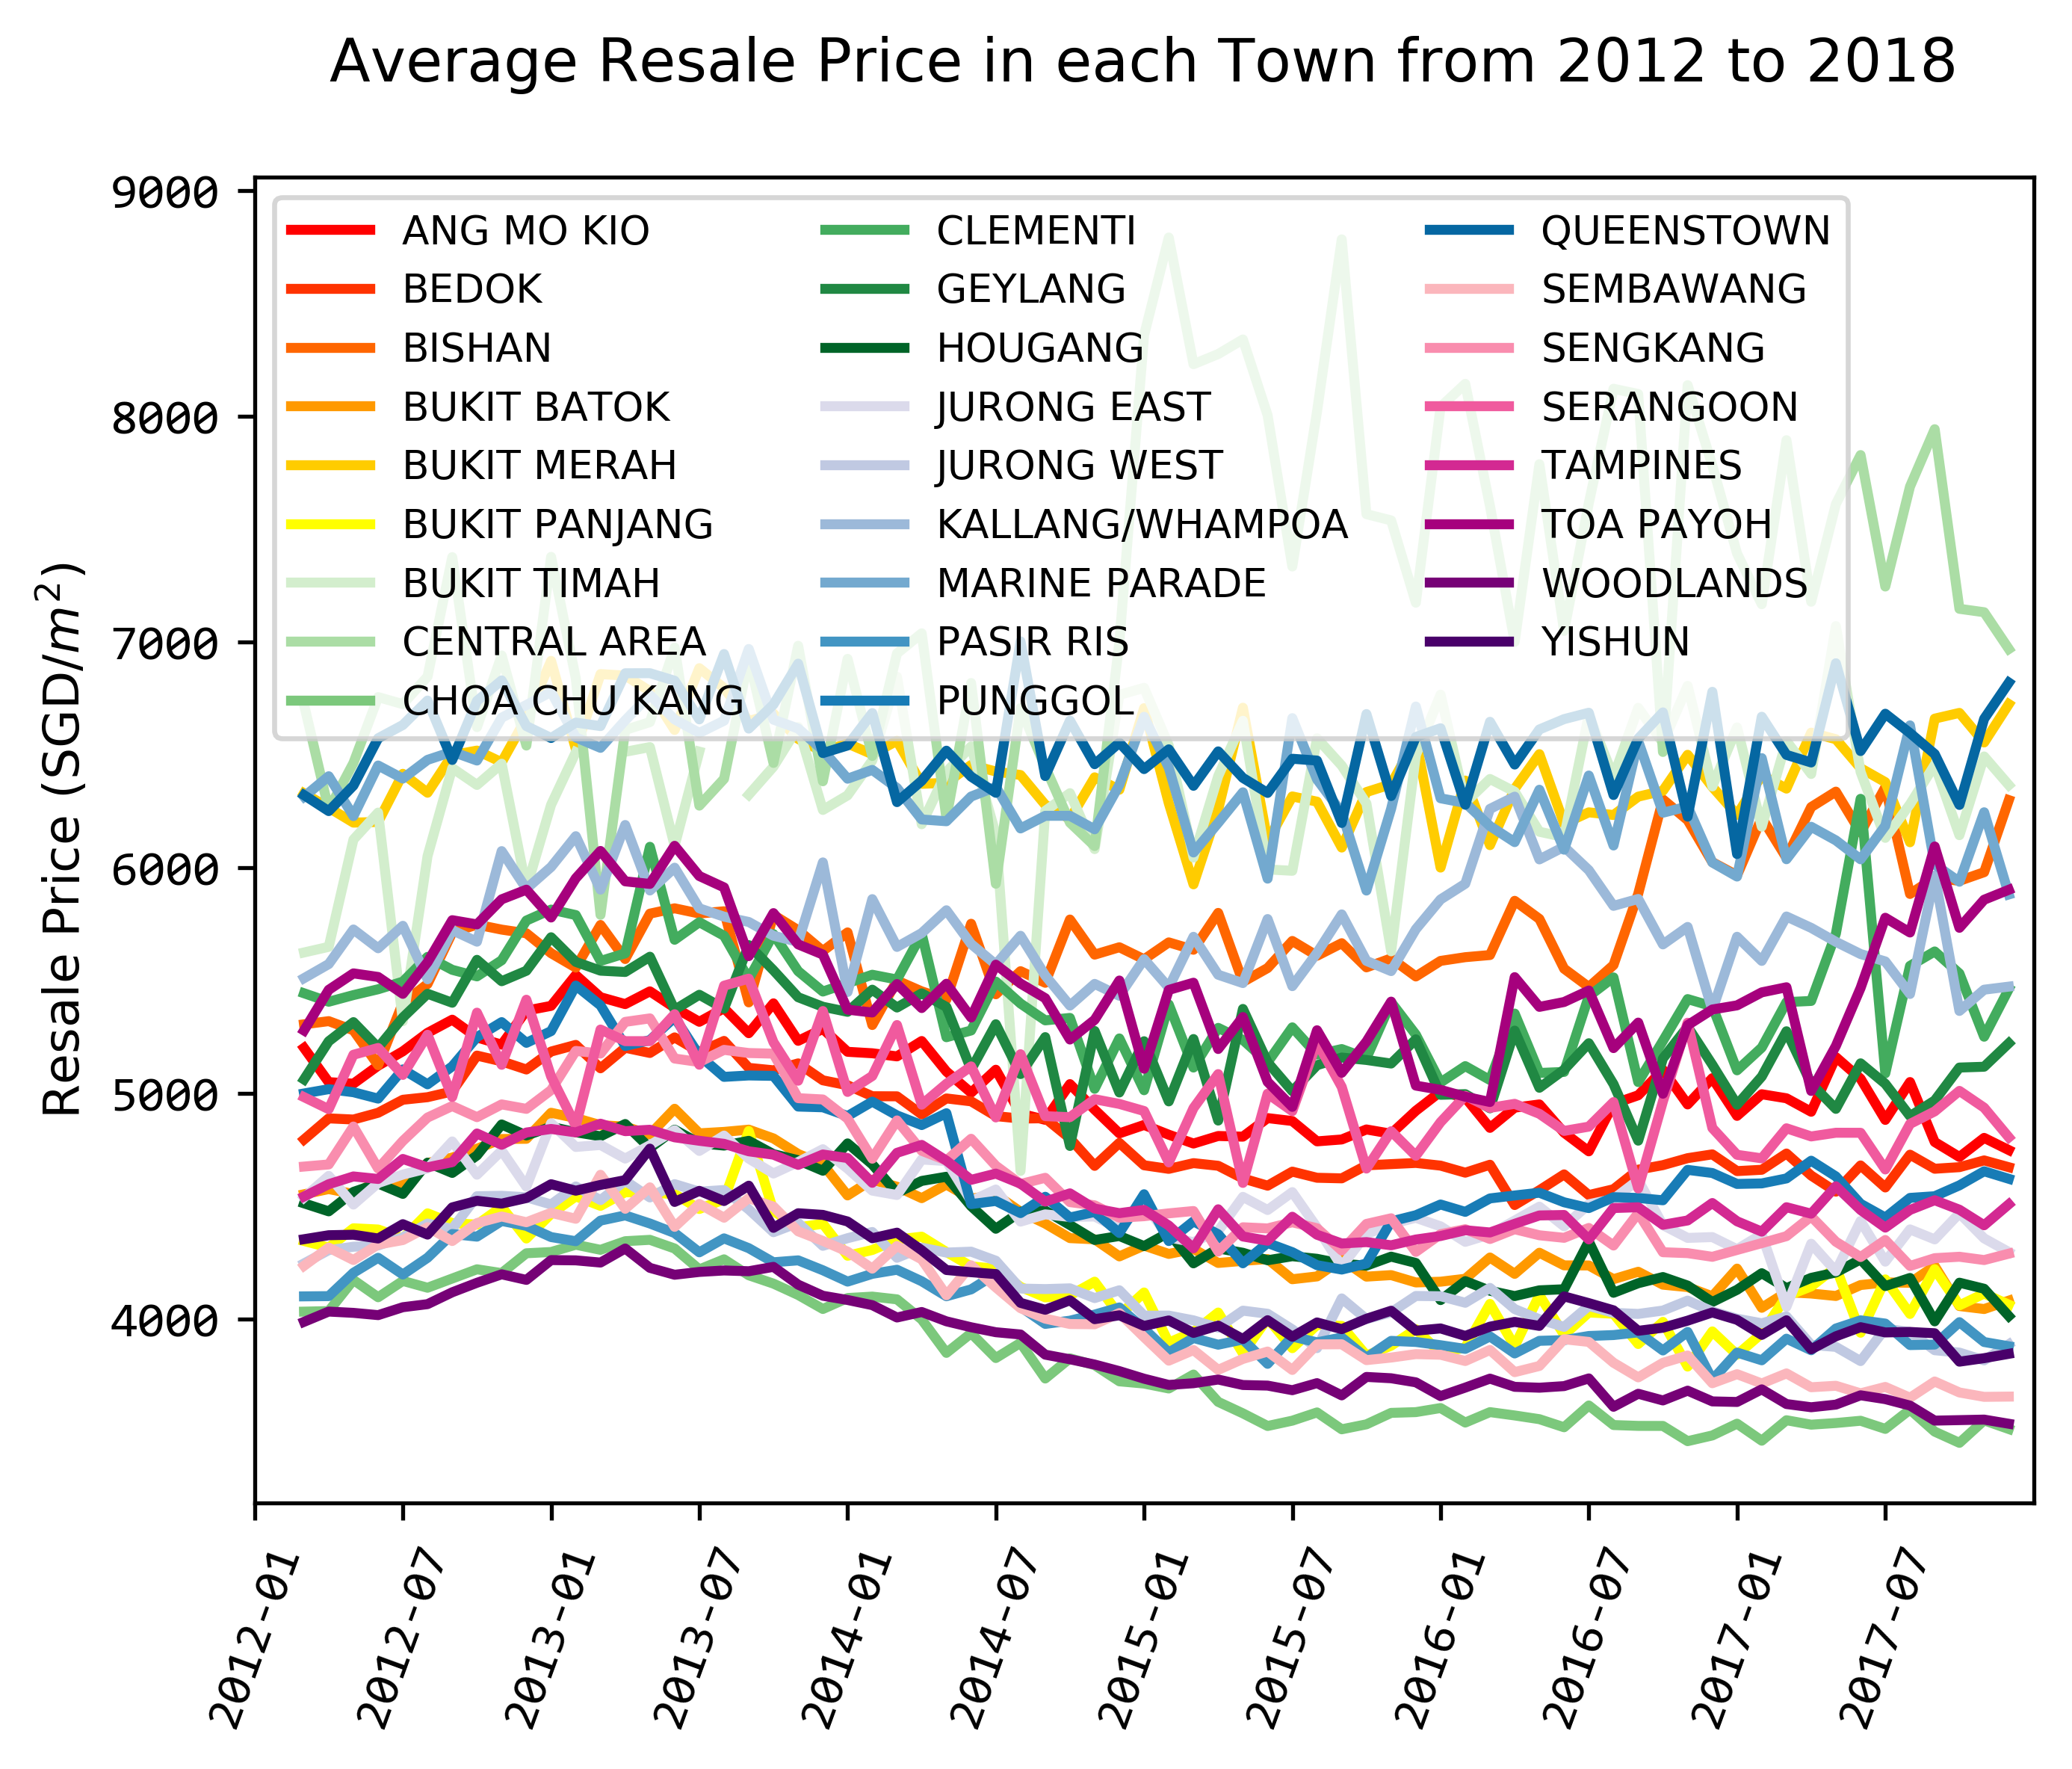

In [29]:
from IPython.display import Image
Image(filename='Average_Resale_Price_in_each_Town_from_2012_to_2018.png') 

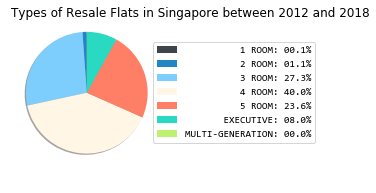

In [40]:
### Types of Resale Flats in Singapore between 2012 and 2018

%matplotlib inline
from matplotlib.gridspec import GridSpec

flat_counts = df.groupby(['flat_type'])['month'].count()
pie_data = []
for flat in flat_types:
    pie_data.append(flat_counts[flat])

grid = GridSpec(1, 2)

# Set figure title.
plt_title = "Types of Resale Flats in Singapore between 2012 and 2018"
plt.suptitle(plt_title, y=0.8, x=0.54)

# Switch to first subplot and plot pie chart.
plt.subplot(grid[0, 0], aspect=1)
patches, texts = plt.pie(pie_data, shadow=True, startangle=90,
                         colors=flat_colors_light,
                         wedgeprops={'linewidth': 0})

# Switch to second subplot and turn off its x,y axis to place legend.
fig = plt.subplot(grid[0, 1], aspect=1)
fig.axis('off')

# Draw legend on second subplot.
percent = [100 * float(data) / sum(pie_data) for data in pie_data]
labels = ["{flat}: {percent:04.1f}%".format(flat=flat.rjust(16), percent=percent[i]) for i, flat in enumerate(flat_types)]
plt.rcParams['font.family'] = 'consolas'  # Use monospace font for alignment.
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, 0.5))

plt.savefig('_'.join(plt_title.split()) + '.png', dpi=96 * 5, bbox_inches='tight')
plt.show()
plt.rcdefaults()  # Restore default settings.

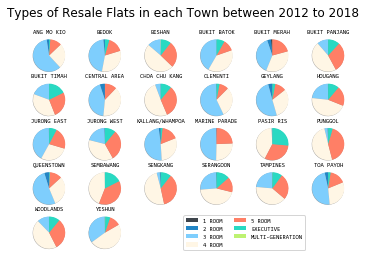

In [41]:
# Types of Resold Flats in each Town between 2012 and 2018
%matplotlib inline
from matplotlib.gridspec import GridSpec

grid = GridSpec(5, 6)

flat_counts = df.groupby(['town', 'flat_type'])['month'].count()

for i, town in enumerate(towns):
    # Switch to a subplot.
    row, col = divmod(i, 6)
    plt.subplot(grid[row, col], aspect=1)
    
    plt.subplots_adjust(hspace = 0.1, wspace=0.001)
    
    pie_data = [flat_counts[town].get(flat, 0) for flat in flat_types]
    patches, texts = plt.pie(pie_data, shadow=True, startangle=90,
                             colors=flat_colors_light,
                             wedgeprops={'linewidth': 0})
    
    plt.title(town, fontproperties=plt_font_small, y=0.9)

# Set figure title.
plt_title = "Types of Resale Flats in each Town between 2012 to 2018"
plt.suptitle(plt_title, y=0.98)

# Switch to legend subplot.
legend_plot = plt.subplot(grid[-1, 2:])
legend_plot.axis('off')

# Set legend font.
plt.rcParams['font.family'] = 'consolas'
plt.rcParams['font.size'] = 6

plt.legend(patches, flat_types, ncol=2, loc='center', bbox_to_anchor=(0.5, 0.5))

# Save image.
plt.savefig('_'.join(plt_title.split()) + '.png', dpi=96*5, bbox_inches='tight')
plt.show()

# Restore default figure settings.
plt.rcdefaults()

In [45]:
#Average Resale Price in each Town a Comparison between 2012 and 2018
town_mean_2012 = {}
town_mean_2018 = {}
town_comparison = {}

df_2018 = df[df['month'].str.contains('2018')]
df_2012 = df[df['month'].str.contains('2012')]
for town in towns:
    ave1 = mean_price_per_sqm(df_2018[df_2018['town'] == town])
    ave2 = mean_price_per_sqm(df_2012[df_2012['town'] == town])
    rate = ave1 / ave2 * 100
    town_mean_2018[town] = ave1
    town_mean_2012[town] = ave2
    town_comparison[town] = rate

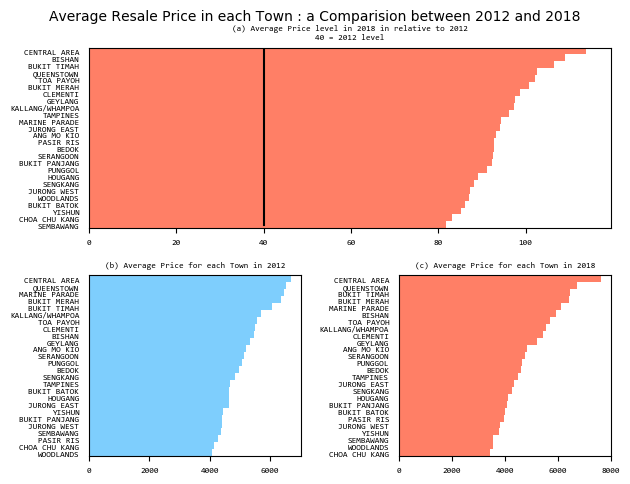

In [50]:
#Average Resale Price in each Town a Comparison between 2012 and 2018  
import math
from matplotlib.gridspec import GridSpec

grid = GridSpec(2, 2)

# Plot bar chart of data in 2012.
plt.subplot(grid[1, 0])

data = sorted([item for item in town_mean_2012.items() if not math.isnan(item[1])], key=lambda x: x[1])
y = [item[0] for item in data]
x = [item[1] for item in data]

plt.barh(range(len(y)), x, height=1.0, align='center', color=bar_color_2000)

plt.ylim([-0.5, len(y) - 0.5])
plt.xticks(fontproperties=plt_font_small)
plt.yticks(range(len(y)), y, fontproperties=plt_font_small)

plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')

plt.title("(b) Average Price for each Town in 2012", fontproperties=plt_font_small)

# Plot bar chart for data in 2018.
plt.subplot(grid[1, 1])

data = sorted([item for item in town_mean_2018.items() if not math.isnan(item[1])], key=lambda x: x[1])
y = [item[0] for item in data]
x = [item[1] for item in data]

plt.barh(range(len(y)), x, height=1.0, align='center', color=bar_color_2015)

plt.ylim([-0.5, len(y) - 0.5])
plt.xticks(fontproperties=plt_font_small)
plt.yticks(range(len(y)), y, fontproperties=plt_font_small)

plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')

plt.title("(c) Average Price for each Town in 2018", fontproperties=plt_font_small)

# Plot bar chart for comparision between 2012 and 2018.
plt.subplot(grid[0, :])

data = sorted([item for item in town_comparison.items() if not math.isnan(item[1])], key=lambda x: x[1])
y = [item[0] for item in data]
x = [item[1] for item in data]

# Plot bar chart.
plt.barh(range(len(y)), x, height=1.0, align='center', color=bar_color_2015)

# Plot reference line which represents 2000 level.
plt.plot((40, 40), (0, len(y)), color='black')

plt.ylim([-0.5, len(y) - 0.5])
plt.xticks(fontproperties=plt_font_small)
plt.yticks(range(len(y)), y, fontproperties=plt_font_small)

plt.tick_params(axis='x', which='both', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')

plt.title("(a) Average Price level in 2018 in relative to 2012\n40 = 2012 level", fontproperties=plt_font_small)

# Set super title.
plt_title = "Average Resale Price in each Town : a Comparision between 2012 and 2018"
plt.suptitle(plt_title, fontsize=10, y=1.0)
plt.tight_layout()
plt.savefig('_'.join([x for x in plt_title.split() if x != ':']) + '.png', dpi=96*3, bbox_inches='tight')